In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Importando Datos

In [3]:
traindata = pd.read_csv('./../data/train.csv')
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testdata = pd.read_csv('./../data/test.csv')
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Análisis de Datos

In [5]:
traindata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
traindata.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Miss. Sigrid Elisabeth",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
print(pd.isnull(traindata).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Análisis por Sexo

Porcentaje de Hombres que sobrevivieron: 18.890814558058924
Porcentaje de Mujeres que sobrevivieron: 74.20382165605095


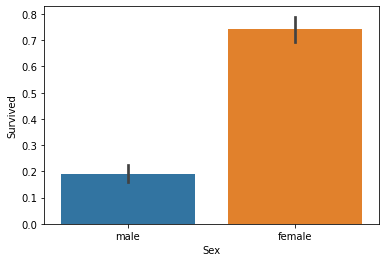

In [23]:
sns.barplot(x='Sex', y='Survived', data=traindata)
x = traindata['Survived'][traindata['Sex'] == 'male'].value_counts(normalize=True)[1]*100
y = traindata['Survived'][traindata['Sex'] == 'female'].value_counts(normalize=True)[1]*100
print('Porcentaje de Hombres que sobrevivieron:', x)
print('Porcentaje de Mujeres que sobrevivieron:', y)

Análisis por Clase

Porcentaje de primera clase que sobrevivieron: 62.96296296296296
Porcentaje de segunda clase que sobrevivieron: 47.28260869565217
Porcentaje de tercera clase que sobrevivieron: 24.236252545824847


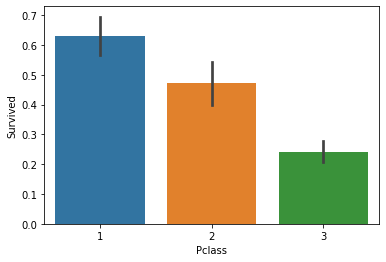

In [25]:
sns.barplot(x='Pclass', y='Survived', data=traindata)
x = traindata['Survived'][traindata['Pclass'] == 1].value_counts(normalize=True)[1]*100
y = traindata['Survived'][traindata['Pclass'] == 2].value_counts(normalize=True)[1]*100
z = traindata['Survived'][traindata['Pclass'] == 3].value_counts(normalize=True)[1]*100
print('Porcentaje de primera clase que sobrevivieron:', x)
print('Porcentaje de segunda clase que sobrevivieron:', y)
print('Porcentaje de tercera clase que sobrevivieron:', z)

Análisis por Rango Etario

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

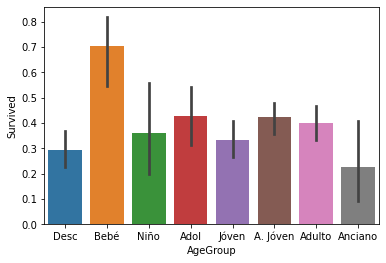

In [41]:
traindata['Age'] = traindata['Age'].fillna(-1)
bins = [-1.5, 0, 5, 12, 18, 25, 35, 60, np.inf]
labels = ['Desc', 'Bebé','Niño', 'Adol', 'Jóven', 'A. Jóven', 'Adulto', 'Anciano']
traindata['AgeGroup'] = pd.cut(traindata['Age'], bins, labels=labels)
sns.barplot(x=traindata['AgeGroup'], y=traindata['Survived'], data=traindata)

Análisis por familia a bordo

[Text(0.5, 0, '# de Hermanxs y Esposxs a bordo')]

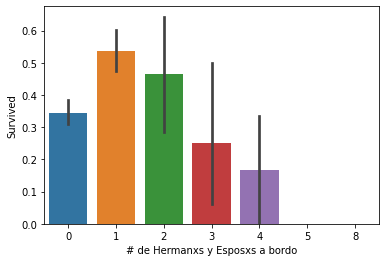

In [44]:
ax = sns.barplot(x=traindata['SibSp'], y=traindata['Survived'], data=traindata)
ax.set(xlabel='# de Hermanxs y Esposxs a bordo')

[Text(0.5, 0, '# de Padres e Hijos a bordo')]

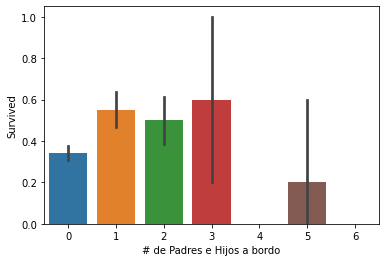

In [46]:
ax = sns.barplot(x=traindata['Parch'], y=traindata['Survived'], data=traindata)
ax.set(xlabel='# de Padres e Hijos a bordo')